### Importers

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Retrieve CSV data

In [5]:
df = pd.read_csv('../Dataset/df.csv', delimiter=',')
df.head()

,open,high,low,close,volume,rsi,macd,macd_signal,ema_20,sma_50,bollinger_m,bollinger_h,bollinger_l,adx,obv
0,3223.81,3242.34,3188.17,3199.21,208.9777,27.571689,-67.489326,-44.385096,3327.124090,3391.8488,3377.8605,3673.135531,3082.585469,49.660240,-1824.9093
1,3196.94,3230.31,3174.58,3205.29,431.7211,28.870805,-68.359493,-49.179975,3315.520844,3391.2780,3360.7320,3654.313252,3067.150748,49.920375,-1393.1882
2,3205.82,3241.44,3115.71,3225.00,686.5435,33.062381,-66.689915,-52.681963,3306.899811,3391.2370,3345.2765,3633.212449,3057.340551,50.629763,-706.6447
3,3225.65,3233.64,3101.83,3105.77,603.9169,23.890807,-74.133066,-56.972184,3287.744591,3388.8268,3325.1490,3620.856088,3029.441912,51.387097,-1310.5616
4,3104.62,3151.03,3068.78,3132.68,688.5189,28.698339,-76.973108,-60.972369,3272.976535,3386.8030,3303.0005,3586.442153,3019.558847,52.314730,-622.0427


### Split dataset

In [6]:
X = df.drop(columns=['close'])
y = df['close']

# Taille du jeu de test (ex: 20%)
split_idx = int(len(df) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Prediction

In [8]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Visualization

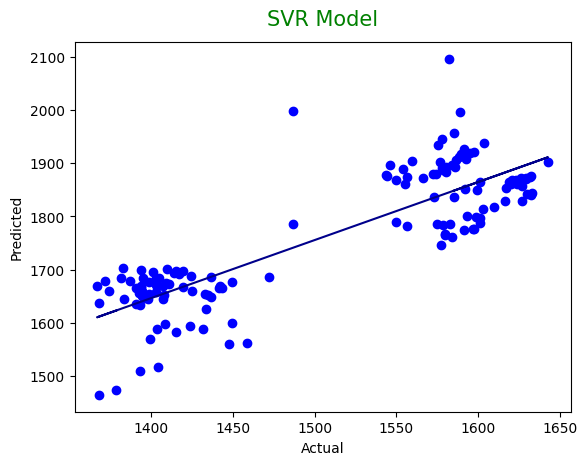

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#visualize model
x = y_test
y = y_pred
plt.title('SVR Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()